## Airbnb
https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data


In [2]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns 
%matplotlib inline 

In [3]:
age_gender_bkts = pd.read_csv('/Users/kubla/Documents/Kubla/Tech/Kaggle/Airbnb/age_gender_bkts.csv')
countries = pd.read_csv('/Users/kubla/Documents/Kubla/Tech/Kaggle/Airbnb/countries.csv')
#sessions = pd.read_csv('/Users/kubla/Documents/Kubla/Tech/Kaggle/Airbnb/sessions.csv')
test_users = pd.read_csv('/Users/kubla/Documents/Kubla/Tech/Kaggle/Airbnb/test_users.csv')
train_users = pd.read_csv('/Users/kubla/Documents/Kubla/Tech/Kaggle/Airbnb/train_users_2.csv')

In [47]:
train = train_users.copy()
test = test_users.copy()
target = train.country_destination

In [42]:
train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [39]:
test.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

In [48]:
train = train.drop(train.columns[15], axis = 1)

In [62]:
df_all = pd.concat([train, test], keys=['train', 'test'])
df_all.head()

id date_account_created  timestamp_first_active  \
train 0  gxn3p5htnn           2010-06-28          20090319043255   
      1  820tgsjxq7           2011-05-25          20090523174809   
      2  4ft3gnwmtx           2010-09-28          20090609231247   
      3  bjjt8pjhuk           2011-12-05          20091031060129   
      4  87mebub9p4           2010-09-14          20091208061105   

        date_first_booking     gender   age signup_method  signup_flow  \
train 0                NaN  -unknown-   NaN      facebook            0   
      1                NaN       MALE  38.0      facebook            0   
      2         2010-08-02     FEMALE  56.0         basic            3   
      3         2012-09-08     FEMALE  42.0      facebook            0   
      4         2010-02-18  -unknown-  41.0         basic            0   

        language affiliate_channel affiliate_provider first_affiliate_tracked  \
train 0       en            direct             direct               untracked   
      1       en               seo             google               untracked   
      2       en            direct             direct               untracked   
      3       en            direct             direct               untracked   
      4       en            direct             direct               untracked   

        signup_app first_device_type first_browser  
train 0        Web       Mac Desktop        Chrome  
      1        Web       Mac Desktop        Chrome  
      2        Web   Windows Desktop            IE  
      3        Web       Mac Desktop       Firefox  
      4        Web       Mac Desktop        Chrome

In [174]:
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [70]:
#countries.head()
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [51]:
df_all['age'].median()

33.0

## Distribution of Gender

In [75]:
df_all['gender'].value_counts()

-unknown-    191376
FEMALE       126082
MALE         108880
OTHER           564
Name: gender, dtype: int64

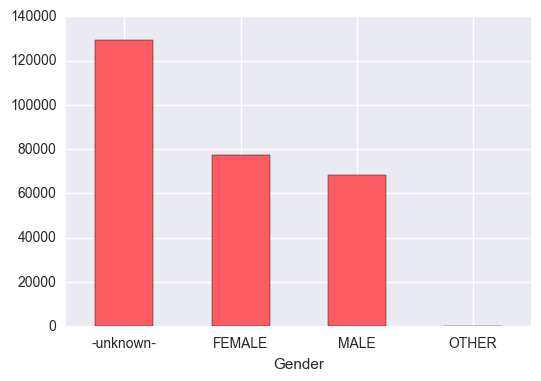

In [52]:
df_all.gender.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
sns.despine()

## Distribution of Densitination

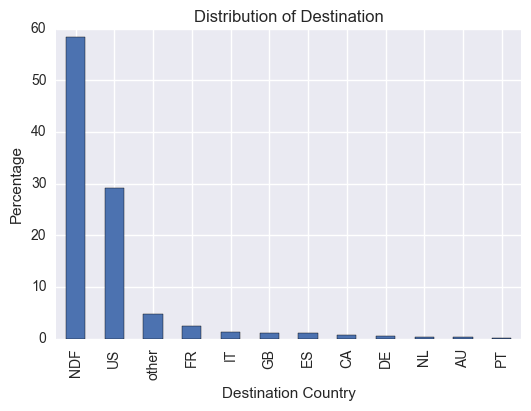

In [56]:
destination_percentage = train_users.country_destination.value_counts() / train_users.shape[0] * 100
destination_percentage.plot(kind='bar')
# Using seaborn can also be plotted
# sns.countplot(x="country_destination", data=users, order=list(users.country_destination.value_counts().keys()))
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Distribution of Destination')
sns.despine()

## Gender vs Destination

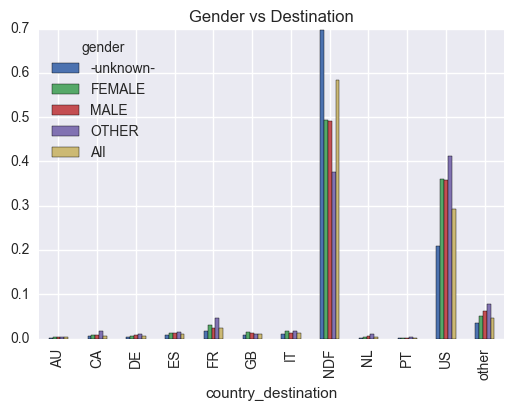

In [59]:
df_gender_dest = pd.crosstab(index = train_users["gender"], columns = train_users["country_destination"],margins=True)
#train_df.index= ["country_destination"]
df_gender_dest_pct = df_gender_dest.div(df_gender_dest["All"], axis=0)
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html
df_gender_dest_pct.drop(df_gender_dest_pct.columns[12], axis=1).T.plot(kind='bar')
plt.title('Gender vs Destination')

In [79]:
df_gender_dest_pct

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other,All
gender,,,,,,,,,,,,,
-unknown-,0.001494,0.005131,0.002968,0.007472,0.017902,0.007922,0.010869,0.696744,0.002372,0.000721,0.210152,0.036253,1.0
FEMALE,0.003284,0.007218,0.005679,0.013531,0.031123,0.013975,0.017306,0.492505,0.004029,0.001237,0.359988,0.050126,1.0
MALE,0.003453,0.008762,0.007641,0.012436,0.024522,0.012528,0.012840,0.490797,0.005107,0.001267,0.357403,0.063244,1.0
OTHER,0.003546,0.017730,0.010638,0.014184,0.046099,0.010638,0.017730,0.375887,0.010638,0.003546,0.411348,0.078014,1.0
All,0.002525,0.006690,0.004971,0.010536,0.023532,0.010888,0.013282,0.583473,0.003570,0.001017,0.292226,0.047290,1.0


People whose gender is "other" are more likely to make a book than others;
People whose gender is "unknown" are less likely to make a book than others

## Distribution of Age

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


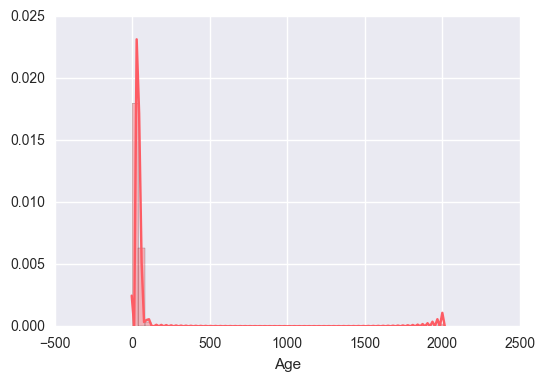

In [60]:
#train_users['age'] = pd.to_numeric(train_users['age'], errors='coerce')
sns.distplot(train_users.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()

In [61]:
train_users.age.dropna().describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [63]:
df_all.age = df_all.age.fillna(0)
df_all.age.median()

25.0

In [64]:
df_all.age[df_all.age > 120] = 34

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## First Browser

In [65]:
df_all.first_browser.value_counts()

Chrome                  78671
Safari                  53302
-unknown-               44394
Firefox                 38665
Mobile Safari           29636
IE                      24744
Chrome Mobile            3186
Android Browser          1577
AOL Explorer              254
Opera                     228
Silk                      172
IE Mobile                 118
BlackBerry Browser         89
Chromium                   83
Mobile Firefox             64
Maxthon                    60
Apple Mail                 45
Sogou Explorer             43
SiteKiosk                  27
Iron                       24
RockMelt                   24
IceWeasel                  14
Yandex.Browser             14
Pale Moon                  13
CometBird                  12
SeaMonkey                  12
Camino                      9
Opera Mini                  8
TenFourFox                  8
wOSBrowser                  7
CoolNovo                    6
Avant Browser               4
Opera Mobile                4
Mozilla   

In [67]:
# first_browser
df_all.first_browser[ - df_all.first_browser.isin(['Chrome', 'Safari', 'Firefox', '-unknown-', 
                                                   'IE', 'Mobile Safari', 'Chrome Mobile', 'Android Browser'])] = 'Other'
train_users.first_browser[ - train_users.first_browser.isin(['Chrome', 'Safari', 'Firefox', '-unknown-', 
                                                   'IE', 'Mobile Safari', 'Chrome Mobile', 'Android Browser'])] = 'Other'

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


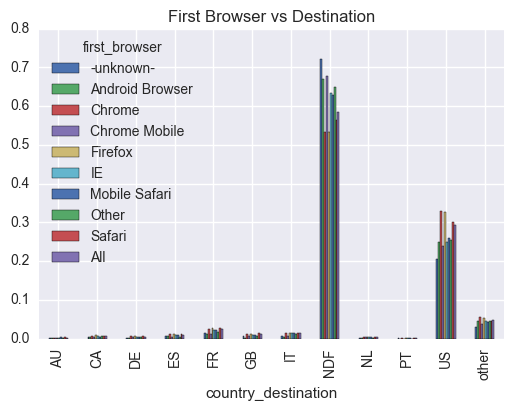

In [69]:
df_browser_dest = pd.crosstab(index = train_users["first_browser"], columns = train_users["country_destination"], margins=True)
df_browser_dest_pct = df_browser_dest.div(df_browser_dest["All"], axis=0)
df_browser_dest_pct.drop(df_browser_dest_pct.columns[12], axis=1).T.plot(kind='bar')
plt.title('First Browser vs Destination')

In [71]:
## first_device_type

In [72]:
df_all.first_device_type.value_counts()

Mac Desktop           106328
Windows Desktop        86948
iPhone                 39814
iPad                   18036
Other/Unknown          11167
Android Phone           9458
Android Tablet          2098
Desktop (Other)         1507
SmartPhone (Other)       191
Name: first_device_type, dtype: int64

In [73]:
df_all['first_device_group'] = df_all.first_device_type
df_all.first_device_group[df_all.first_device_group.isin(['Mac Desktop', 'Windows Desktop', 'Desktop (Other)'])] = 'Desktop'
df_all.first_device_group[df_all.first_device_group.isin(['iPhone', 'Android Phone', 'SmartPhone (Other)'])] = 'Mobile'
df_all.first_device_group[df_all.first_device_group.isin(['iPad', 'Android Tablet'])] = 'Tablet'
df_all.first_device_group.value_counts()

train_users['first_device_group'] = train_users.first_device_type
train_users.first_device_group[train_users.first_device_group.isin(['Mac Desktop', 'Windows Desktop', 'Desktop (Other)'])] = 'Desktop'
train_users.first_device_group[train_users.first_device_group.isin(['iPhone', 'Android Phone', 'SmartPhone (Other)'])] = 'Mobile'
train_users.first_device_group[train_users.first_device_group.isin(['iPad', 'Android Tablet'])] = 'Tablet'
train_users.first_device_group.value_counts()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value 

Desktop          163515
Mobile            23638
Tablet            15631
Other/Unknown     10667
Name: first_device_group, dtype: int64

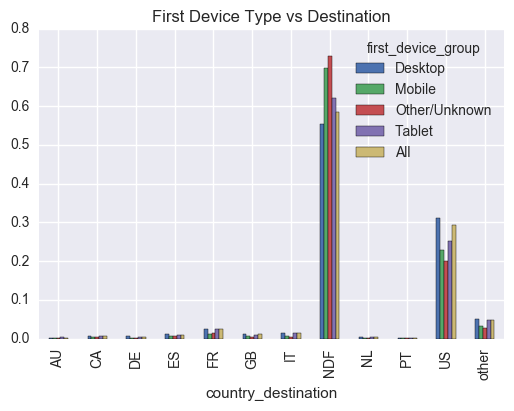

In [75]:
df_device_dest = pd.crosstab(index = train_users["first_device_group"], columns = train_users["country_destination"], margins=True)
df_device_dest_pct = df_device_dest.div(df_device_dest["All"], axis=0)
df_device_dest_pct.drop(df_device_dest_pct.columns[12], axis=1).T.plot(kind='bar')
plt.title('First Device Type vs Destination')

People who using desktop are more likely to book a flight while people using other/unknown device are less likely to book.

Booking rank: Desktop, Tablet, Movile, Other/Unknown

## First Affiliate Tracked

In [76]:
df_all.first_affiliate_tracked.value_counts()

untracked        143181
linked            62064
omg               54859
tracked-other      6655
product            2353
marketing           281
local ops            69
Name: first_affiliate_tracked, dtype: int64

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


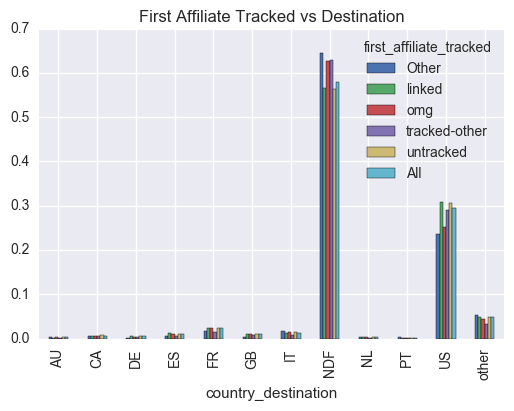

In [79]:
# all
df_all.first_affiliate_tracked[df_all.first_affiliate_tracked.isin(['local ops', 'marketing', 'product'])] = 'Other'

#df_affiliate_dest = pd.crosstab(index = df_all["first_affiliate_tracked"], columns = df_all["country_destination"], margins=True)
#df_affiliate_dest_pct = df_affiliate_dest.div(df_affiliate_dest["All"], axis=0)
#df_affiliate_dest_pct.drop(df_affiliate_dest_pct.columns[12], axis=1).T.plot(kind='bar')

# train
train_users.first_affiliate_tracked[train_users.first_affiliate_tracked.isin(['local ops', 'marketing', 'product'])] = 'Other'

df_affiliate_dest = pd.crosstab(index = train_users["first_affiliate_tracked"], columns = train_users["country_destination"], margins=True)
df_affiliate_dest_pct = df_affiliate_dest.div(df_affiliate_dest["All"], axis=0)
df_affiliate_dest_pct.drop(df_affiliate_dest_pct.columns[12], axis=1).T.plot(kind='bar')
plt.title('First Affiliate Tracked vs Destination')

In [80]:
df_all.affiliate_provider.value_counts()

direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719
craigslist               3475
padmapper                 836
vast                      830
yahoo                     653
facebook-open-graph       566
gsp                       455
meetup                    358
email-marketing           270
naver                      66
baidu                      32
yandex                     18
wayn                        8
daum                        3
Name: affiliate_provider, dtype: int64

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


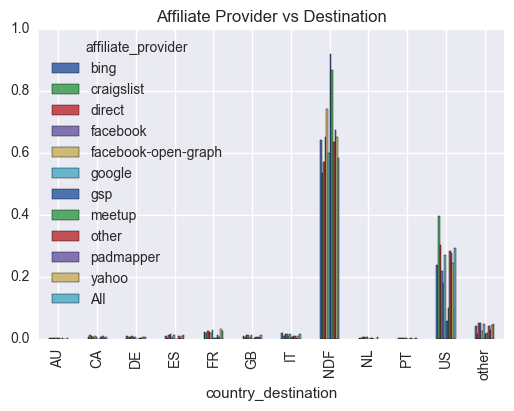

In [81]:
# all
df_all.affiliate_provider[ - df_all.affiliate_provider.isin(['direct', 'google', 'other', 'craigslist', 
                                             'bing', 'facebook', 'padmapper', 'facebook-open-graph',
                                             'yahoo','gsp','meetup'])] = 'other'
# train
train_users.affiliate_provider[ - train_users.affiliate_provider.isin(['direct', 'google', 'other', 'craigslist', 
                                             'bing', 'facebook', 'padmapper', 'facebook-open-graph',
                                             'yahoo','gsp','meetup'])] = 'other'
df_provider_dest = pd.crosstab(index = train_users["affiliate_provider"], columns = train_users["country_destination"], margins=True)
df_provider_dest_pct = df_provider_dest.div(df_provider_dest["All"], axis=0)
df_provider_dest_pct.drop(df_provider_dest_pct.columns[12], axis=1).T.plot(kind='bar')
plt.title('Affiliate Provider vs Destination')

## Language

In [82]:
df_all.language.value_counts()

en           265538
zh             2634
fr             1508
es             1174
ko             1116
de              977
it              633
ru              508
ja              345
pt              322
sv              176
nl              134
tr               92
pl               75
da               75
no               51
cs               49
el               30
th               28
hu               25
id               23
fi               20
ca                6
is                5
hr                2
-unknown-         1
Name: language, dtype: int64

en    
zh: Chinese
fr: French
es: Spanish
ko      1494
de      1464
it: Italy
ru: Russian
pt       480
ja       450
sv       244
nl       194
tr       128
da       116
pl       108
cs        64
no        60
el        48
th        48
id        44
hu        36
fi        28
ca        10
is        10
hr         4


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


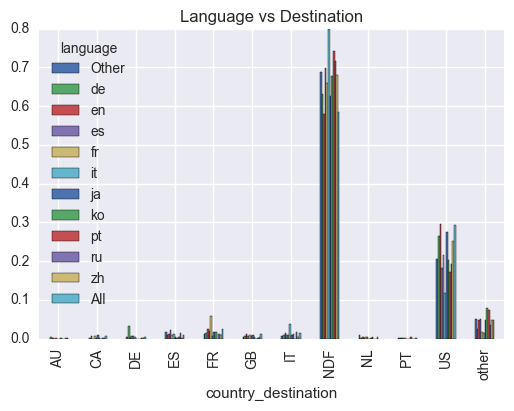

In [83]:
# all
df_all.language[- df_all.language.isin(['en', 'zh', 'fr','es','ko','de','it','ru','pt','ja'])] = 'Other'
# train
train_users.language[- train_users.language.isin(['en', 'zh', 'fr','es','ko','de','it','ru','pt','ja'])] = 'Other'
df_language_dest = pd.crosstab(index = train_users["language"], columns = train_users["country_destination"], margins=True)
df_language_dest_pct = df_language_dest.div(df_language_dest["All"], axis=0)
df_language_dest_pct.drop(df_language_dest_pct.columns[12], axis=1).T.plot(kind='bar')
plt.title('Language vs Destination')

## Sign up

In [84]:
df_all.signup_flow.value_counts()

0     206092
25     29834
12     11244
3       8822
2       6881
23      6408
24      4328
1       1047
8        315
6        301
21       197
5         36
20        14
16        11
15        10
14         4
10         2
4          1
Name: signup_flow, dtype: int64

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


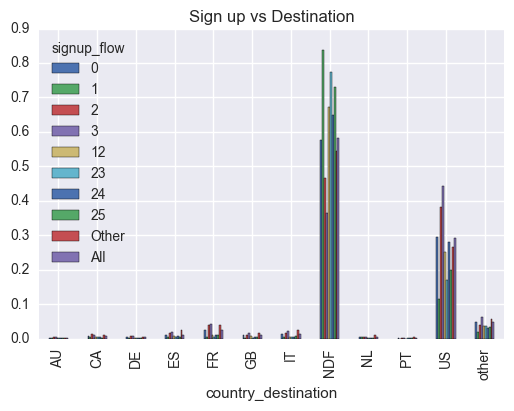

In [85]:
df_all.signup_flow[df_all.signup_flow.isin([4, 10, 14, 15, 16, 20, 5, 21, 6, 8])] = 'Other'
train_users.signup_flow[train_users.signup_flow.isin([4, 10, 14, 15, 16, 20, 5, 21, 6, 8])] = 'Other'


df_signup_flow_dest = pd.crosstab(index = train_users["signup_flow"], columns = train_users["country_destination"], margins=True)
df_signup_flow_dest_pct = df_signup_flow_dest.div(df_signup_flow_dest["All"], axis=0)
df_signup_flow_dest_pct.drop(df_signup_flow_dest_pct.columns[12], axis=1).T.plot(kind='bar')
plt.title('Sign up vs Destination')

In [126]:
#date_account_created 2010-06-28
#timestamp_first_active 20090319043255
#pd.to_datetime(df_all.date_account_created , format='%YYYY%mm%dd')
df_all.head()

id date_account_created  timestamp_first_active  \
train 0  gxn3p5htnn           2010-06-28          20090319043255   
      1  820tgsjxq7           2011-05-25          20090523174809   
      2  4ft3gnwmtx           2010-09-28          20090609231247   
      3  bjjt8pjhuk           2011-12-05          20091031060129   
      4  87mebub9p4           2010-09-14          20091208061105   

        date_first_booking     gender   age signup_method signup_flow  \
train 0                NaN  -unknown-   NaN      facebook           0   
      1                NaN       MALE  38.0      facebook           0   
      2         2010-08-02     FEMALE  56.0         basic           3   
      3         2012-09-08     FEMALE  42.0      facebook           0   
      4         2010-02-18  -unknown-  41.0         basic           0   

        language affiliate_channel affiliate_provider first_affiliate_tracked  \
train 0       en            direct             direct               untracked   
      1       en               seo             google               untracked   
      2       en            direct             direct               untracked   
      3       en            direct             direct               untracked   
      4       en            direct             direct               untracked   

        signup_app first_device_type first_browser country_destination  
train 0        Web       Mac Desktop        Chrome                 NDF  
      1        Web       Mac Desktop        Chrome                 NDF  
      2        Web   Windows Desktop            IE                  US  
      3        Web       Mac Desktop       Firefox               other  
      4        Web       Mac Desktop        Chrome                  US

## Extract Information from date

Here, we can extract year, month, day, the number of week and the weekday of account created date and first active date

In [89]:
# Time
df_all.date_account_created = pd.to_datetime(df_all.date_account_created, format='%Y-%m-%d')
df_all['year'] = df_all['date_account_created'].apply(lambda x: x.year)
df_all['month'] = df_all['date_account_created'].apply(lambda x: x.month)
df_all['day'] = df_all['date_account_created'].apply(lambda x: x.day)
df_all['week'] = df_all['date_account_created'].apply(lambda x: x.week)
df_all['weekday'] = df_all['date_account_created'].apply(lambda x: x.weekday_name)

In [90]:
# timestamp_first_active
df_all.timestamp_first_active = pd.to_datetime(df_all.timestamp_first_active, format='%Y%m%d%H%M%S')
df_all['first_year'] = df_all['timestamp_first_active'].apply(lambda x: x.year)
df_all['first_month'] = df_all['timestamp_first_active'].apply(lambda x: x.month)
df_all['first_day'] = df_all['timestamp_first_active'].apply(lambda x: x.day)
df_all['first_week'] = df_all['timestamp_first_active'].apply(lambda x: x.week)
df_all['first_weekday'] = df_all['timestamp_first_active'].apply(lambda x: x.weekday_name)
df_all['first_hour'] = df_all['timestamp_first_active'].apply(lambda x: x.hour)
df_all['interval'] = df_all.timestamp_first_active - df_all.date_account_created

In [86]:
# weekday vs booking
#df_weekday_dest = pd.crosstab(index = df_all["weekday"], columns = df_all["country_destination"], margins=True)
#df_weekday_dest_pct = df_weekday_dest.div(df_weekday_dest["All"], axis=0)
#df_weekday_dest_pct.drop(df_weekday_dest_pct.columns[12], axis=1).T.plot(kind='bar')

In [87]:
# month vs booking
#df_month_dest = pd.crosstab(index = df_all["month"], columns = df_all["country_destination"], margins=True)
#df_month_dest_pct = df_month_dest.div(df_month_dest["All"], axis=0)
#df_month_dest_pct.drop(df_month_dest_pct.columns[12], axis=1).T.plot(kind='bar')

In [91]:
df_all.dtypes

id                                  object
date_account_created        datetime64[ns]
timestamp_first_active      datetime64[ns]
date_first_booking                  object
gender                              object
age                                float64
signup_method                       object
signup_flow                         object
language                            object
affiliate_channel                   object
affiliate_provider                  object
first_affiliate_tracked             object
signup_app                          object
first_device_type                   object
first_browser                       object
first_device_group                  object
year                                 int64
month                                int64
day                                  int64
week                                 int64
weekday                             object
first_year                           int64
first_month                          int64
first_day  

In [94]:
df_all.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'first_device_group', 'year', 'month', 'day', 'week',
       'weekday', 'first_year', 'first_month', 'first_day', 'first_week',
       'first_weekday', 'first_hour', 'interval'],
      dtype='object')

In [105]:
df = df_all.drop(df_all.columns[[0, 1, 2, 3, 13]], axis = 1)

In [106]:
df.dtypes

gender                              object
age                                float64
signup_method                       object
signup_flow                         object
language                            object
affiliate_channel                   object
affiliate_provider                  object
first_affiliate_tracked             object
signup_app                          object
first_browser                       object
first_device_group                  object
year                                 int64
month                                int64
day                                  int64
week                                 int64
weekday                             object
first_year                           int64
first_month                          int64
first_day                            int64
first_week                           int64
first_weekday                       object
first_hour                           int64
interval                   timedelta64[ns]
dtype: obje

In [102]:
df.columns

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'first_device_group', 'year', 'month', 'day', 'week', 'weekday',
       'first_year', 'first_month', 'first_day', 'first_week', 'first_weekday',
       'first_hour', 'interval'],
      dtype='object')

In [107]:
 # Categorize!
#df[df.columns[[0, 2, 3,4, 5, 6, 7, 9,10,11, 12,13,14,15,16,17,18,19 ]]] = df[df.columns[[0, 1, 2, 3]]].apply(lambda x: x.astype('category'))
df[df.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]] = df[df.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]].apply(lambda x: x.astype('category'))

In [120]:
# get dummies
dat = pd.get_dummies(df,columns=df.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]])

In [121]:
dat.head()

age            interval  gender_-unknown-  gender_FEMALE  \
train 0   0.0 -466 days +04:32:55               1.0            0.0   
      1  38.0 -732 days +17:48:09               0.0            0.0   
      2  56.0 -476 days +23:12:47               0.0            1.0   
      3  42.0 -765 days +06:01:29               0.0            1.0   
      4  41.0 -280 days +06:11:05               1.0            0.0   

         gender_MALE  gender_OTHER  signup_method_basic  \
train 0          0.0           0.0                  0.0   
      1          1.0           0.0                  0.0   
      2          0.0           0.0                  1.0   
      3          0.0           0.0                  0.0   
      4          0.0           0.0                  1.0   

         signup_method_facebook  signup_method_google  signup_method_weibo  \
train 0                     1.0                   0.0                  0.0   
      1                     1.0                   0.0                  0.0   
      2                     0.0                   0.0                  0.0   
      3                     1.0                   0.0                  0.0   
      4                     0.0                   0.0                  0.0   

             ...        first_hour_14  first_hour_15  first_hour_16  \
train 0      ...                  0.0            0.0            0.0   
      1      ...                  0.0            0.0            0.0   
      2      ...                  0.0            0.0            0.0   
      3      ...                  0.0            0.0            0.0   
      4      ...                  0.0            0.0            0.0   

         first_hour_17  first_hour_18  first_hour_19  first_hour_20  \
train 0            0.0            0.0            0.0            0.0   
      1            1.0            0.0            0.0            0.0   
      2            0.0            0.0            0.0            0.0   
      3            0.0            0.0            0.0            0.0   
      4            0.0            0.0            0.0            0.0   

         first_hour_21  first_hour_22  first_hour_23  
train 0            0.0            0.0            0.0  
      1            0.0            0.0            0.0  
      2            0.0            0.0            1.0  
      3            0.0            0.0            0.0  
      4            0.0            0.0            0.0  

[5 rows x 312 columns]

In [122]:
dat.columns

Index(['age', 'interval', 'gender_-unknown-', 'gender_FEMALE', 'gender_MALE',
       'gender_OTHER', 'signup_method_basic', 'signup_method_facebook',
       'signup_method_google', 'signup_method_weibo',
       ...
       'first_hour_14', 'first_hour_15', 'first_hour_16', 'first_hour_17',
       'first_hour_18', 'first_hour_19', 'first_hour_20', 'first_hour_21',
       'first_hour_22', 'first_hour_23'],
      dtype='object', length=312)

## Classification Modeling to Predict Destination Country

In [119]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn.preprocessing import scale, StandardScaler, Imputer, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm

In [124]:
dat_train = dat.xs('train', level = 0)

In [135]:
dat_train.head()

,age,interval,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,...,first_hour_14,first_hour_15,first_hour_16,first_hour_17,first_hour_18,first_hour_19,first_hour_20,first_hour_21,first_hour_22,first_hour_23
0,0.0,-466 days +04:32:55,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38.0,-732 days +17:48:09,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,56.0,-476 days +23:12:47,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,42.0,-765 days +06:01:29,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.0,-280 days +06:11:05,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
dat_test = dat.xs('test', level = 0)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(dat_train.drop(dat_train.columns[1], axis=1), target, test_size=0.30, random_state=42)

In [ ]:
weights = {0:1, 1:3}

In [138]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         AU       0.04      0.01      0.01       171
         CA       0.01      0.00      0.00       420
         DE       0.00      0.00      0.00       334
         ES       0.01      0.00      0.00       686
         FR       0.03      0.01      0.01      1505
         GB       0.02      0.00      0.01       748
         IT       0.02      0.00      0.01       866
        NDF       0.65      0.82      0.73     37206
         NL       0.00      0.00      0.00       225
         PT       0.00      0.00      0.00        77
         US       0.44      0.37      0.40     18785
      other       0.06      0.01      0.02      3013

avg / total       0.51      0.59      0.54     64036



In [ ]:
y_train.value_counts()